<a href="https://colab.research.google.com/github/Hannah-GOng/GPU-Demo-Stock-Price-LSTM/blob/main/GPU_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **GPU Demos**




In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [2]:
# The tech stocks we'll use
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-10-12,3496.239990,3339.550049,3349.939941,3442.929932,8364200.0,3442.929932,AMAZON
2020-10-13,3492.379883,3424.219971,3467.989990,3443.629883,5744700.0,3443.629883,AMAZON
2020-10-14,3464.879883,3340.000000,3447.000000,3363.709961,5828900.0,3363.709961,AMAZON
2020-10-15,3355.879883,3280.000000,3292.010010,3338.649902,5223400.0,3338.649902,AMAZON
2020-10-16,3399.659912,3160.000000,3363.229980,3272.709961,6474400.0,3272.709961,AMAZON
2020-10-19,3329.000000,3192.739990,3299.610107,3207.209961,5223600.0,3207.209961,AMAZON
2020-10-20,3266.000000,3192.010010,3222.280029,3217.010010,4509700.0,3217.010010,AMAZON
2020-10-21,3233.879883,3160.000000,3212.500000,3184.939941,4592700.0,3184.939941,AMAZON
2020-10-22,3198.750000,3121.939941,3189.870117,3176.399902,4212000.0,3176.399902,AMAZON


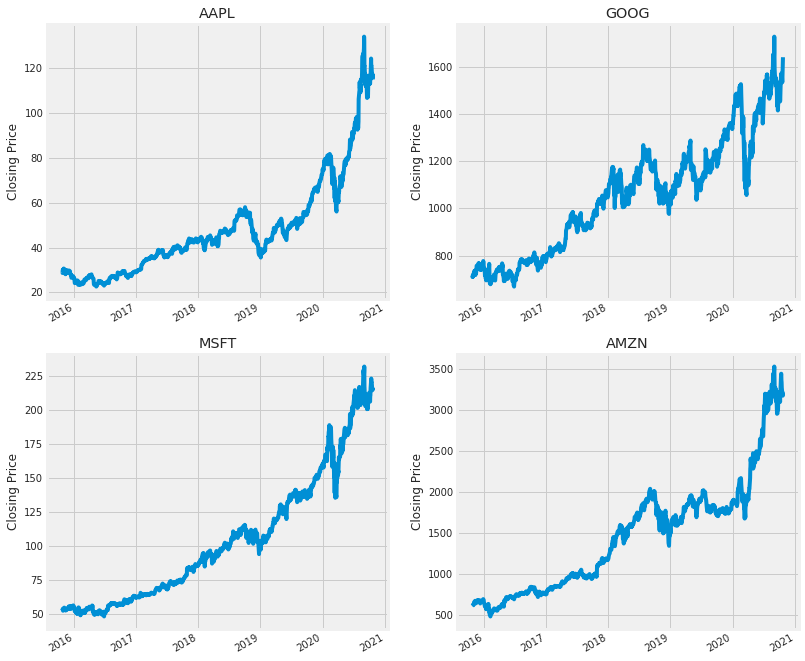

In [5]:
# historical view of closing price
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Closing Price')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

In [6]:
## predict AAPL Price

data = AAPL.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_data_len

1008

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_aapl = scaler.fit_transform(dataset)
scaled_aapl

array([[0.05587169],
       [0.05423632],
       [0.06481026],
       ...,
       [0.8448856 ],
       [0.83484929],
       [0.828487  ]])

In [8]:
#create train data set
train_data = scaled_aapl[0:int(training_data_len), :]
aapl_x_train = []
aapl_y_train = []

for i in range(60, len(train_data)):
    aapl_x_train.append(train_data[i-60:i, 0])
    aapl_y_train.append(train_data[i, 0])
# Convert the x_train and y_train to numpy arrays 
aapl_x_train, aapl_y_train = np.array(aapl_x_train), np.array(aapl_y_train)
#Reshape the data
aapl_x_train = np.reshape(aapl_x_train, (aapl_x_train.shape[0], aapl_x_train.shape[1], 1))
print(aapl_x_train.shape, aapl_y_train.shape)

(948, 60, 1) (948,)


In [9]:
import re
import tensorflow as tf
from sklearn.preprocessing  import StandardScaler,MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [10]:
# RNN
regressor = Sequential()

# Adding a LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'tanh', return_sequences = True, input_shape = (aapl_x_train.shape[1], 1)))
regressor.add(Dropout(0.5))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'tanh', return_sequences = True))
regressor.add(Dropout(0.3))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80,activation = 'tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'tanh'))
regressor.add(Dropout(0.2))
 
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(aapl_x_train, aapl_y_train, epochs = 10, batch_size = 6)

Epoch 1/10
158/158 [==============================] - 11s 66ms/step - loss: 0.0018
Epoch 2/10
158/158 [==============================] - 10s 66ms/step - loss: 6.4809e-04
Epoch 3/10
158/158 [==============================] - 10s 66ms/step - loss: 6.0643e-04
Epoch 4/10
158/158 [==============================] - 11s 67ms/step - loss: 4.7682e-04
Epoch 5/10
158/158 [==============================] - 11s 67ms/step - loss: 4.4522e-04
Epoch 6/10
158/158 [==============================] - 10s 66ms/step - loss: 4.3215e-04
Epoch 7/10
158/158 [==============================] - 14s 87ms/step - loss: 6.6410e-04
Epoch 8/10
158/158 [==============================] - 11s 72ms/step - loss: 3.3494e-04
Epoch 9/10
158/158 [==============================] - 11s 69ms/step - loss: 3.9193e-04
Epoch 10/10
158/158 [==============================] - 11s 68ms/step - loss: 3.4857e-04


In [12]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            14880     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 80)                5